## Stock Analysis with Time Series data

In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## First Install pandas-datareader

In [3]:
!pip install pandas-datareader

Defaulting to user installation because normal site-packages is not writeable
     ------------------------------------ 109.5/109.5 kB 288.4 kB/s eta 0:00:00


In [4]:
import pandas_datareader as pdr
from datetime import datetime

## Stock Analysis

## you can also try pdr.get_data_yahoo()
how can you get API?
just sign up (polygon.io) and then login 
it gives you a API keys.

In [9]:
df = pdr.get_data_alphavantage('TSLA',api_key='gdi6RV7GeU_SikJ4hZgOerx1bUHpVT7O')

In [10]:
df.head()

,open,high,low,close,volume
2010-06-29,19.00,25.0000,17.54,23.89,18766300
2010-06-30,25.79,30.4192,23.30,23.83,17187100
2010-07-01,25.00,25.9200,20.27,21.96,8218800
2010-07-02,23.00,23.1000,18.71,19.20,5139800
2010-07-06,20.00,20.0000,15.83,16.11,6866900


<AxesSubplot:>

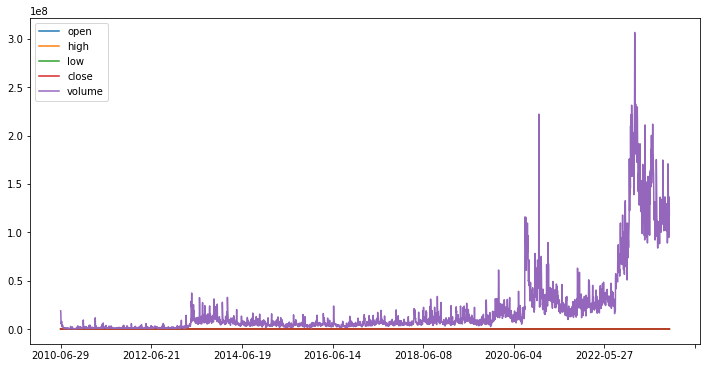

In [14]:
df.plot(figsize = (12,6))

<AxesSubplot:>

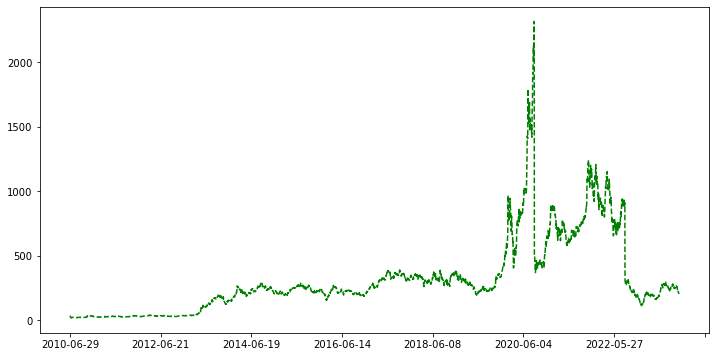

In [36]:
df['high'].plot(figsize = (12,6), color = 'Green', ls='--') # ls mean line style
# df['high'].plot(xlim=['2019-01-01','2022-05-27'],ylim=[0,900],figsize = (12,6))

In [37]:
df.index

Index(['2010-06-29', '2010-06-30', '2010-07-01', '2010-07-02', '2010-07-06',
       '2010-07-07', '2010-07-08', '2010-07-09', '2010-07-12', '2010-07-13',
       ...
       '2023-10-18', '2023-10-19', '2023-10-20', '2023-10-23', '2023-10-24',
       '2023-10-25', '2023-10-26', '2023-10-27', '2023-10-30', '2023-10-31'],
      dtype='object', length=3359)

In [44]:
df_in = df.loc['2010-06-29':'2010-07-13'].index
share = df.loc['2010-06-29':'2010-07-13']['open']

In [43]:
share

2010-06-29    19.0000
2010-06-30    25.7900
2010-07-01    25.0000
2010-07-02    23.0000
2010-07-06    20.0000
2010-07-07    16.4000
2010-07-08    16.1400
2010-07-09    17.5800
2010-07-12    17.9500
2010-07-13    17.3938
Name: open, dtype: float64

In [45]:
df_in

Index(['2010-06-29', '2010-06-30', '2010-07-01', '2010-07-02', '2010-07-06',
       '2010-07-07', '2010-07-08', '2010-07-09', '2010-07-12', '2010-07-13'],
      dtype='object')

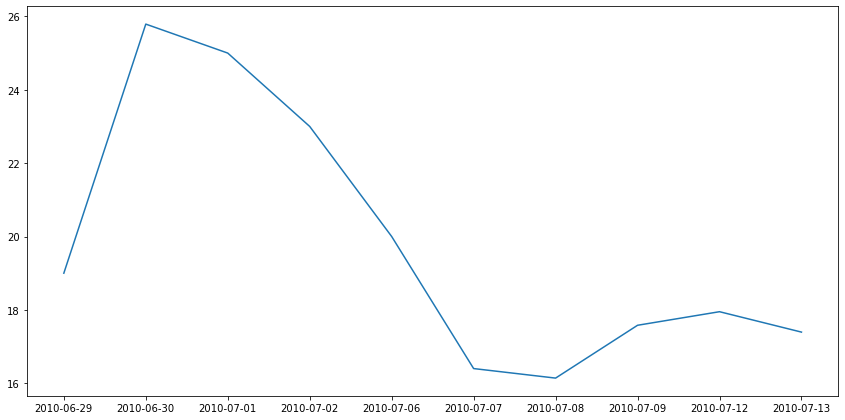

In [59]:
figure,axis = plt.subplots()
plt.tight_layout()
#figure.autofmt_xdata()
axis.plot(df_in,share)

## DateTime index 

In [101]:
df1 = df.reset_index() # for this part here create a 'index' column here all the date are placed

# renamed it for proper understanding
df1.rename(columns={
    'index': 'date'
}, inplace = True)

In [102]:
df1

,date,open,high,low,close,volume
0,2010-06-29,19.00,25.0000,17.54,23.89,18766300
1,2010-06-30,25.79,30.4192,23.30,23.83,17187100
2,2010-07-01,25.00,25.9200,20.27,21.96,8218800
3,2010-07-02,23.00,23.1000,18.71,19.20,5139800
4,2010-07-06,20.00,20.0000,15.83,16.11,6866900
...,...,...,...,...,...,...
3354,2023-10-25,215.88,220.1000,212.20,212.42,107065087
3355,2023-10-26,211.32,214.8000,204.88,205.76,115112635
3356,2023-10-27,210.60,212.4100,205.77,207.30,94881173
3357,2023-10-30,209.28,210.8800,194.67,197.36,136448167


we can see that my date column already in datetime formate 
but if it was not in date time formate then just type
pd.to_datetime(df1['date'])


 it gives a datetime formate


In [103]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3359 entries, 0 to 3358
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    3359 non-null   object 
 1   open    3359 non-null   float64
 2   high    3359 non-null   float64
 3   low     3359 non-null   float64
 4   close   3359 non-null   float64
 5   volume  3359 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 157.6+ KB


In [104]:
from datetime import datetime

In [105]:
date = datetime(2023,11,2)

In [106]:
date

datetime.datetime(2023, 11, 2, 0, 0)

In [107]:
date.date()

datetime.date(2023, 11, 2)

In [108]:
date.day

2

In [109]:
date.month

11

In [110]:
datetime.now()

datetime.datetime(2023, 11, 2, 22, 26, 58, 148576)

### let's find runtime using date time

In [111]:
def add_num(num1,num2):
    return num1+num2

start_t = datetime.now()
num1 = 20
num2 = 30
add_num(num1,num2)
end_t = datetime.now()
print(end_t - start_t)

0:00:00.001000


it means it's execute time less then 1 sec

## Time Resampling

In [112]:
df1

,date,open,high,low,close,volume
0,2010-06-29,19.00,25.0000,17.54,23.89,18766300
1,2010-06-30,25.79,30.4192,23.30,23.83,17187100
2,2010-07-01,25.00,25.9200,20.27,21.96,8218800
3,2010-07-02,23.00,23.1000,18.71,19.20,5139800
4,2010-07-06,20.00,20.0000,15.83,16.11,6866900
...,...,...,...,...,...,...
3354,2023-10-25,215.88,220.1000,212.20,212.42,107065087
3355,2023-10-26,211.32,214.8000,204.88,205.76,115112635
3356,2023-10-27,210.60,212.4100,205.77,207.30,94881173
3357,2023-10-30,209.28,210.8800,194.67,197.36,136448167


In [113]:
df1 = df1.set_index('date')

In [114]:
df1

,open,high,low,close,volume
date,,,,,
2010-06-29,19.00,25.0000,17.54,23.89,18766300
2010-06-30,25.79,30.4192,23.30,23.83,17187100
2010-07-01,25.00,25.9200,20.27,21.96,8218800
2010-07-02,23.00,23.1000,18.71,19.20,5139800
2010-07-06,20.00,20.0000,15.83,16.11,6866900
...,...,...,...,...,...
2023-10-25,215.88,220.1000,212.20,212.42,107065087
2023-10-26,211.32,214.8000,204.88,205.76,115112635
2023-10-27,210.60,212.4100,205.77,207.30,94881173


In [115]:
df1.index

Index(['2010-06-29', '2010-06-30', '2010-07-01', '2010-07-02', '2010-07-06',
       '2010-07-07', '2010-07-08', '2010-07-09', '2010-07-12', '2010-07-13',
       ...
       '2023-10-18', '2023-10-19', '2023-10-20', '2023-10-23', '2023-10-24',
       '2023-10-25', '2023-10-26', '2023-10-27', '2023-10-30', '2023-10-31'],
      dtype='object', name='date', length=3359)

In [116]:
df1.index = pd.to_datetime(df1.index) # for date time formate

In [118]:
df2 = df1.resample('A').min()

In [119]:
df2

,open,high,low,close,volume
date,,,,,
2010-12-31,16.14,16.6300,14.980,15.80,118500
2011-12-31,21.78,22.2700,21.110,21.83,239600
2012-12-31,26.62,26.8500,22.640,22.79,364900
2013-12-31,33.08,33.3800,32.110,32.91,440200
2014-12-31,140.50,147.0000,136.671,139.34,1333518
2015-12-31,185.83,189.2899,181.400,185.00,710277
2016-12-31,142.32,154.9700,141.050,143.67,1659530
2017-12-31,214.75,220.3300,210.960,216.99,2186723
2018-12-31,252.78,260.3300,244.590,250.56,3080724


In [120]:
df3 = df1.resample(rule = 'A').max()
df3

,open,high,low,close,volume
date,,,,,
2010-12-31,35.870,36.42,34.7500,35.47,18766300
2011-12-31,34.630,35.00,34.0310,34.94,11517800
2012-12-31,38.190,39.95,37.1104,38.01,5680400
2013-12-31,193.960,194.50,188.3700,193.37,37163900
2014-12-31,287.670,291.42,280.4000,286.04,32681700
2015-12-31,280.195,286.65,276.3000,282.26,15649607
2016-12-31,266.450,269.34,254.5100,265.42,23742414
2017-12-31,386.690,389.61,379.3450,385.00,19731322
2018-12-31,375.000,387.46,367.1200,379.57,33649700


<AxesSubplot:xlabel='date'>

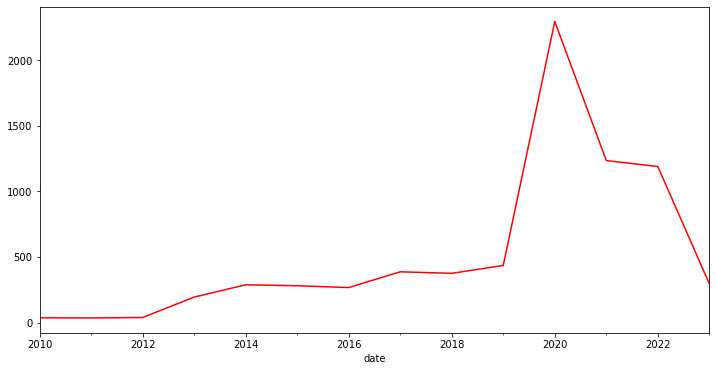

In [123]:
df1.resample(rule = 'A').max()['open'].plot(color = 'Red')

#### https://towardsdatascience.com/resample-function-of-pandas-79b17ec82a78
check it out

<AxesSubplot:xlabel='date'>

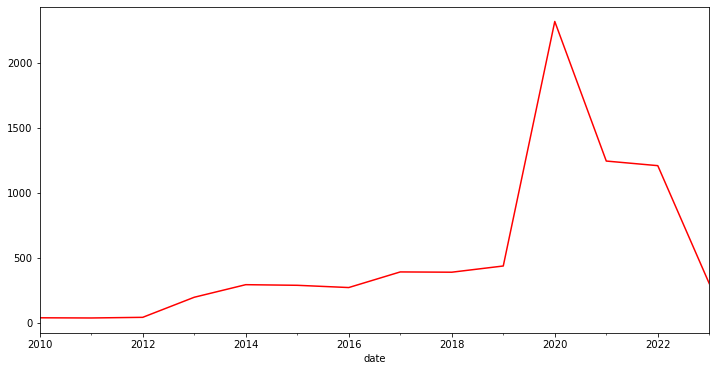

In [125]:
# Business End Frequency
df1.resample(rule = 'BA').max()['high'].plot(color = 'Red')

<AxesSubplot:xlabel='date'>

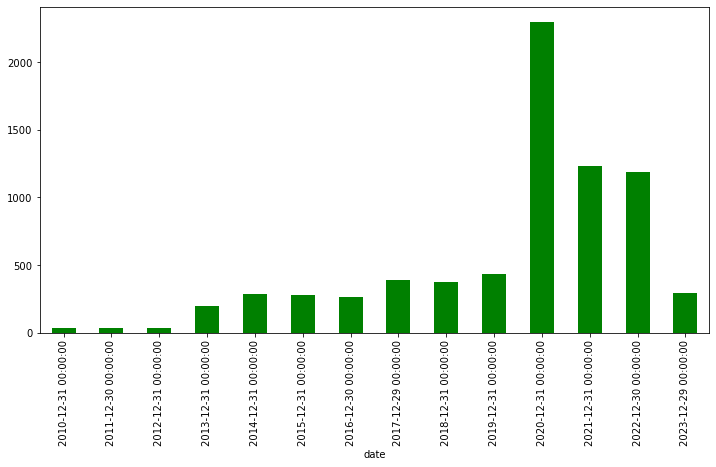

In [127]:
df1.resample(rule = 'BA').max()['open'].plot(color = 'Green',kind = 'bar')

<AxesSubplot:xlabel='date'>

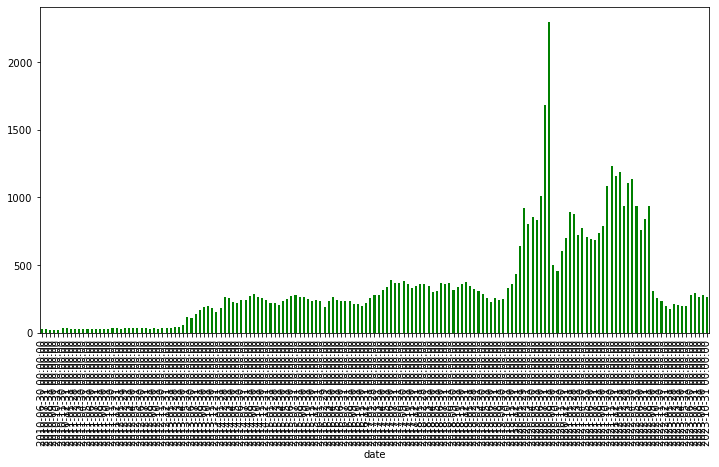

In [131]:
df1.resample(rule = 'M').max()['open'].plot(color = 'Green',kind = 'bar')

In [135]:
#df1.rolling(11)['open'].max()
df1['high'].rolling(10).mean().head(20)

date
2010-06-29         NaN
2010-06-30         NaN
2010-07-01         NaN
2010-07-02         NaN
2010-07-06         NaN
2010-07-07         NaN
2010-07-08         NaN
2010-07-09         NaN
2010-07-12         NaN
2010-07-13    21.31992
2010-07-14    20.83492
2010-07-15    19.94300
2010-07-16    19.48100
2010-07-19    19.39600
2010-07-20    19.58100
2010-07-21    20.00800
2010-07-22    20.38100
2010-07-23    20.74700
2010-07-26    21.09000
2010-07-27    21.34400
Name: high, dtype: float64

In [136]:
df1['Open 20 days rolling'] = df1['open'].rolling(20).mean()

In [137]:
df1

,open,high,low,close,volume,Open 20 days rolling
date,,,,,,
2010-06-29,19.00,25.0000,17.54,23.89,18766300,NaN
2010-06-30,25.79,30.4192,23.30,23.83,17187100,NaN
2010-07-01,25.00,25.9200,20.27,21.96,8218800,NaN
2010-07-02,23.00,23.1000,18.71,19.20,5139800,NaN
2010-07-06,20.00,20.0000,15.83,16.11,6866900,NaN
...,...,...,...,...,...,...
2023-10-25,215.88,220.1000,212.20,212.42,107065087,244.2415
2023-10-26,211.32,214.8000,204.88,205.76,115112635,242.8065
2023-10-27,210.60,212.4100,205.77,207.30,94881173,240.8365


<AxesSubplot:xlabel='date'>

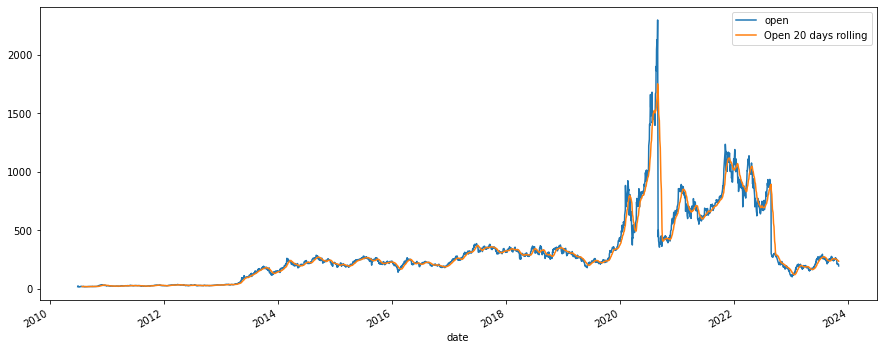

In [139]:
df1[['open','Open 20 days rolling']].plot(figsize = (15,6))